In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pandas.read_csv('Life_Expectancy_Data.csv')

print(data.shape)
data.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Daten Reinigen

In [2]:
data = data.drop(columns=[' BMI ', 'Hepatitis B', 'Measles ', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years', 'Polio', ' thinness 5-9 years', 'Alcohol'])

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,under-five deaths,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,83,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,86,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,89,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,93,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,97,7.87,63.537231,2978599.0,0.454,9.5


In [3]:
#Wie viele Daten sind leer
anzahlVorher = data.shape[0]
(data.isnull().sum()*100/anzahlVorher).round(2)

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
percentage expenditure              0.00
under-five deaths                   0.00
Total expenditure                   7.69
GDP                                15.25
Population                         22.19
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [4]:
#Leeren und doppelte Daten löschen
data = data.dropna().drop_duplicates()
anzahlNachher = data.shape[0]
print('Gelöschte Daten',(anzahlVorher-anzahlNachher)/anzahlVorher)

Gelöschte Daten 0.2784206943498979


In [5]:
#Strings und Column Namen cleanen

data['Country'] = data['Country'].str.strip().replace("  ", " ")
data = data.rename(columns=lambda x: x.strip().replace(" ", "_").lower())

#Daten anschauen
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,under-five_deaths,total_expenditure,gdp,population,income_composition_of_resources,schooling
count,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2.120000e+03,2120.000000,2120.000000
mean,2007.008019,68.607736,170.207075,34.791509,896.200782,48.448113,6.011684,6668.754949,1.295167e+07,0.617634,11.871368
std,4.321488,9.874708,130.342070,134.641842,2234.966254,183.321461,2.366598,13746.824413,6.290383e+07,0.210235,3.358798
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,0.370000,1.681350,3.400000e+01,0.000000,0.000000
25%,2003.000000,62.100000,72.000000,0.000000,31.733260,1.000000,4.380000,418.596976,1.935450e+05,0.476750,9.800000
50%,2007.000000,71.400000,146.500000,3.000000,126.656161,4.000000,5.890000,1456.398383,1.354634e+06,0.662500,12.100000
75%,2011.000000,75.400000,237.000000,23.000000,549.411134,32.250000,7.700000,4953.377583,7.292426e+06,0.765250,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,19479.911610,2500.000000,14.390000,119172.741800,1.293859e+09,0.945000,20.700000


# Daten Visualisierung

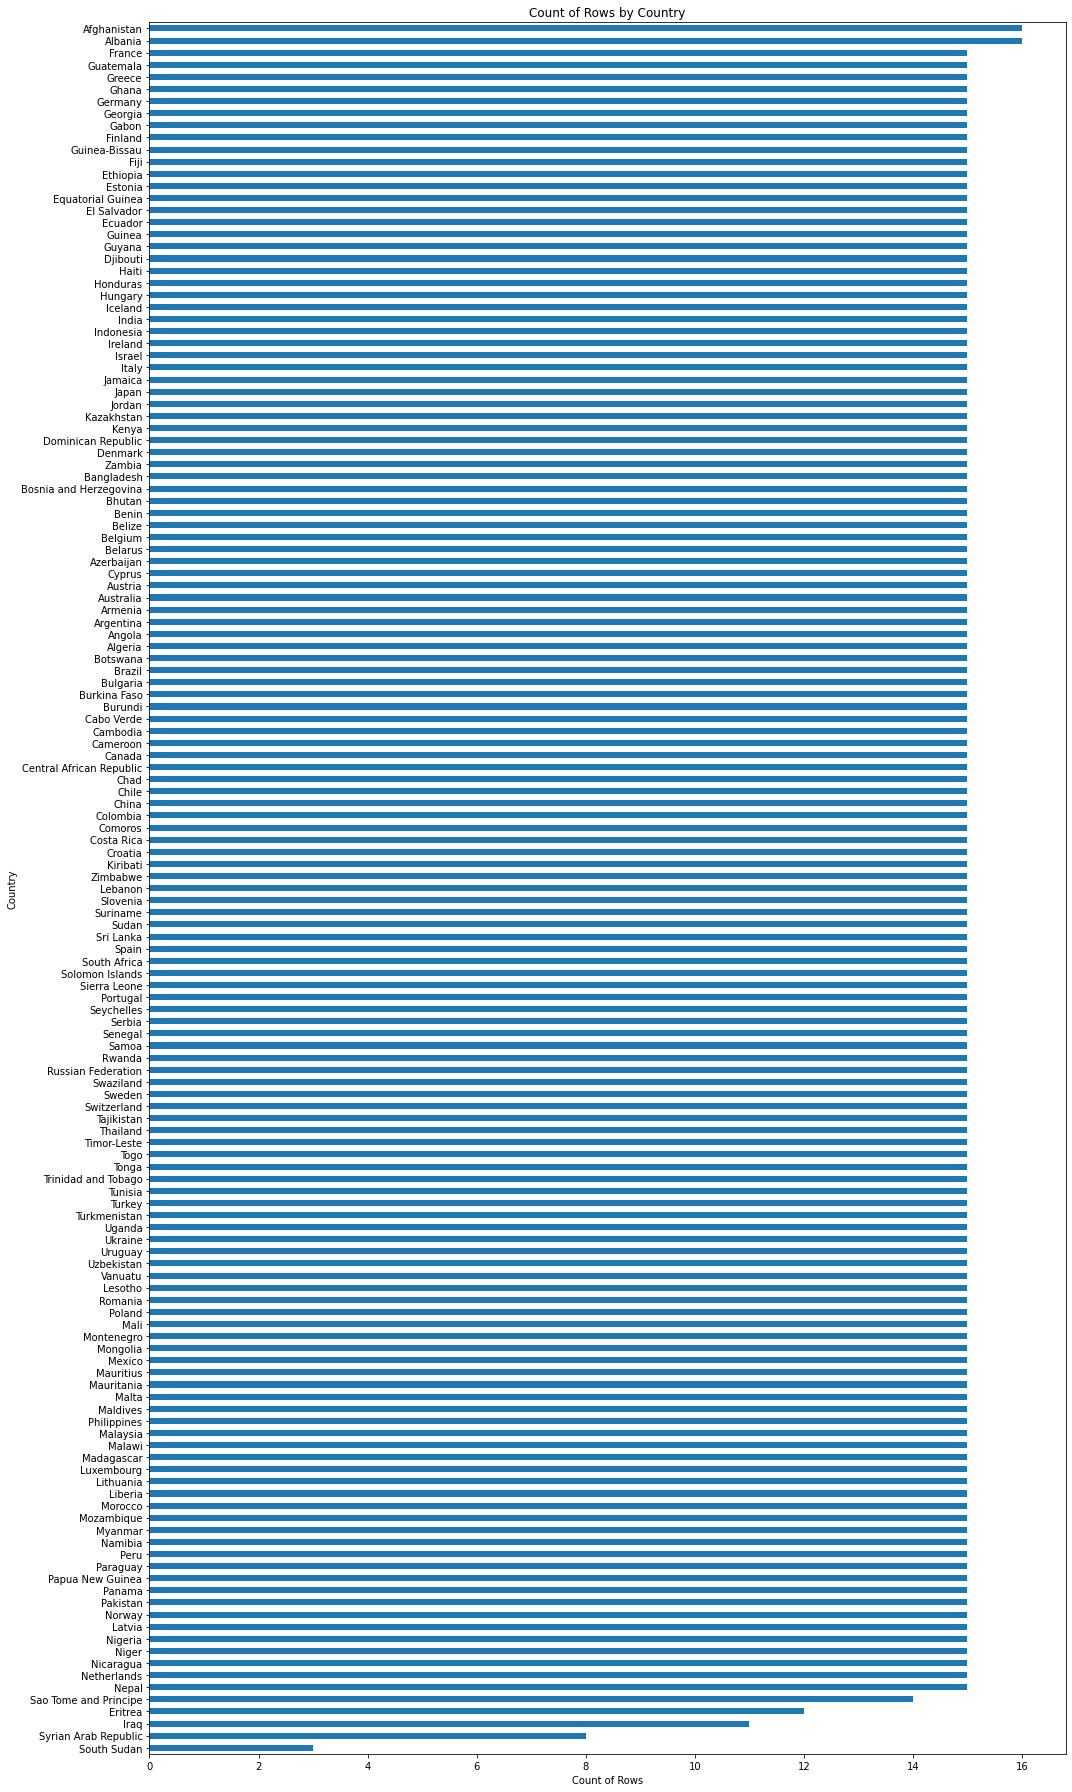

In [6]:
plt.figure(figsize=(15, 25))
data.country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

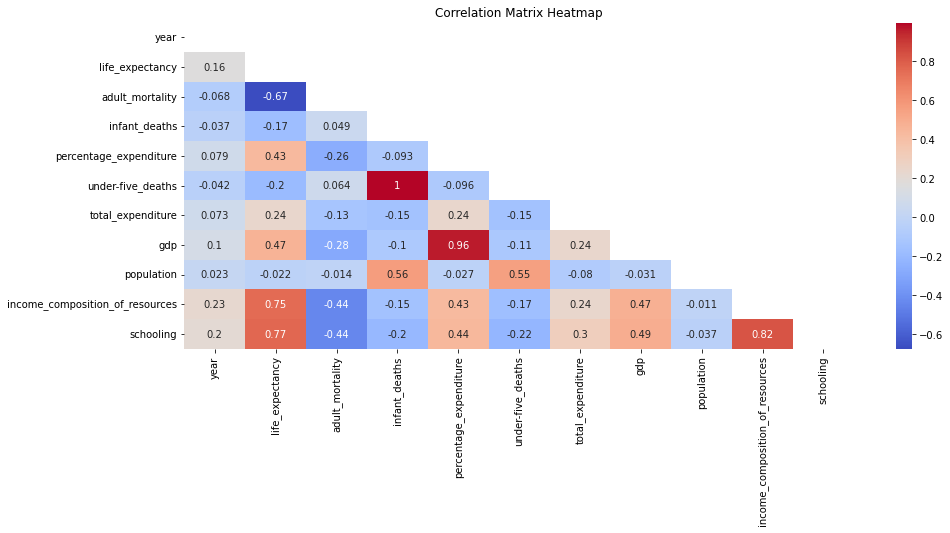

In [7]:

corr = data.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

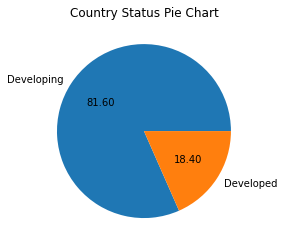

In [8]:

plt.figure(facecolor='white')
data["status"].value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')
plt.show()

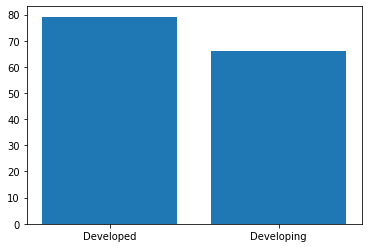

In [9]:

plt.bar(data.groupby('status')['status'].count().index,data.groupby('status')['life_expectancy'].mean())
plt.show()


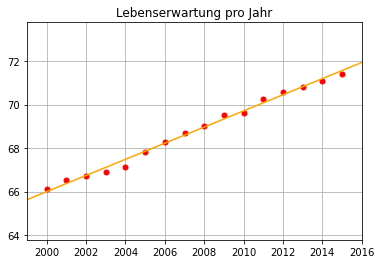

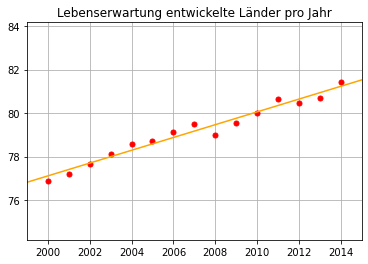

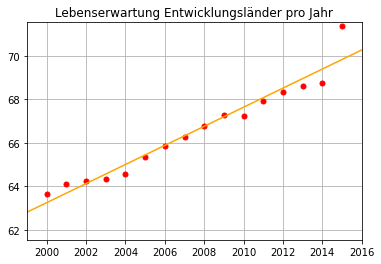

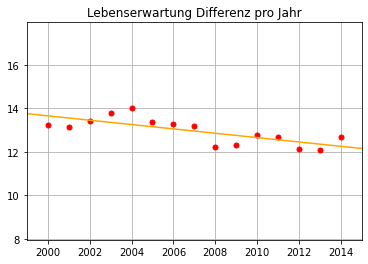

In [10]:
def plot_leastsquares(x, y, grid=True, title="", verbose=False, yRange=None):
    #Zu Numpy Arrays
    x = x.to_numpy()
    y = y.to_numpy()
    
    #Least Squares berechnen
    cm = np.cov(x,y,bias=True)
    a = cm[0,1]/(cm[0,0])
    b = y.mean() - a * x.mean()
    if verbose:
        print(a, b)
    
    #Plot zeichnen
    plt.plot(x, y, 'o', color='red', markersize=5)
    xmin = np.min(x)-1
    xmax = np.max(x)+1

    if yRange is None:  
        ymin = np.min(y)-1
        ymax = np.max(y)+1
    else:
        ymean = np.mean(y)
        ymin = ymean - yRange/2
        ymax = ymean + yRange/2
        
    plt.axis([xmin,xmax,ymin,ymax])
    xticks = np.arange(xmin, xmax, (xmax-xmin)/1000.)
    plt.plot(xticks, a*xticks+b, '-', color='orange')
    plt.title(title)
    plt.grid(grid)
    plt.show() 


plot_leastsquares(data.groupby('year')['year'].count().index, data.groupby('year')['life_expectancy'].mean(), title='Lebenserwartung pro Jahr', yRange=10)


developed = data[data['status'] == 'Developed']
plot_leastsquares(developed.groupby('year')['year'].count().index, developed.groupby('year')['life_expectancy'].mean(), title='Lebenserwartung entwickelte Länder pro Jahr', yRange=10)


developing = data[data['status'] == 'Developing']
plot_leastsquares(developing.groupby('year')['year'].count().index,developing.groupby('year')['life_expectancy'].mean(), title='Lebenserwartung Entwicklungsländer pro Jahr', yRange=10)


diff = developed.groupby('year')['life_expectancy'].mean() - developing.groupby('year')['life_expectancy'].mean()[:15]
plot_leastsquares(developing.groupby('year')['year'].count().index[:15], diff, title='Lebenserwartung Differenz pro Jahr', yRange=10)